In [2]:
using DifferentialEquations
using Interact
using Plots
using Combinatorics
using StatsBase
gr()

Plots.GRBackend()

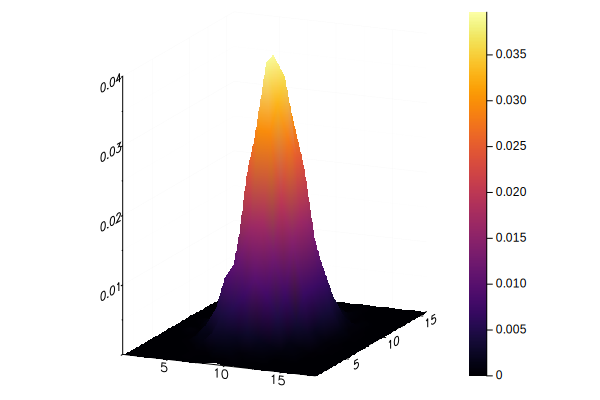

In [38]:
# Algorithm 2.1 of Random Eigenvalues by Alan Edelman

# Experiment : Generate random samples from the normal distribution
# Plot : Histogram of random samples
# Theory : The normal distribution curve

##  Experiment
t  = 10000  # trials
dx = .25       # binsize
v  = randn(2,t) # samples
x  = -4:dx:4

NBins = 8/dx

## TODO: Plot..

## Plot Histogram
#count = histogram2d(v, x-dx/2)
#count = histogram2d(v, nbins=20)
#[X,Y] = meshgrid(x,x)
#count(count < .005*t*dx^2) = NaN # Don't plot near zero bins
#plot(x,x,count/(t*dx^2))

#histogram2d(randn(t),randn(t), nbins=50)

v_hist = fit(Histogram,(randn(t), randn(t)),closed=:left,nbins = NBins)
surface(v_hist.weights./(t), alpha=0.4)


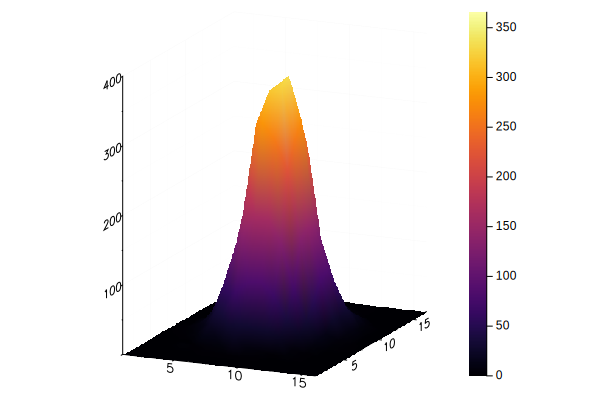

In [ ]:
#Algorithm 2.2

## TODO: Implement

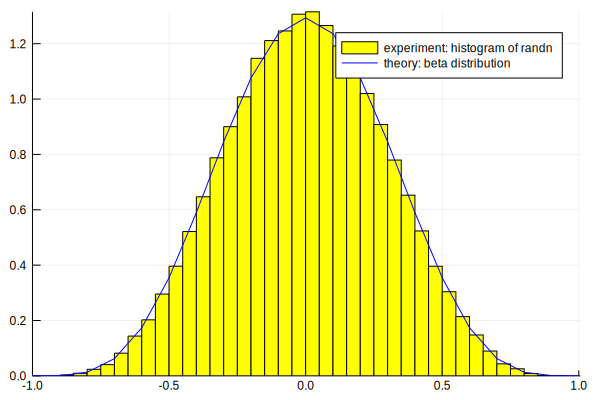

In [32]:
#Algorithm 2.3 of Random Eigenvalues by Alan Edelman

#Experiment: Random components of a vector on a sphere
#Plot: Histogram of a single component
#Theory: Beta Distribution

##Parameters
t=100000  # trials
n=12   # dimension of sphere
dx=0.1 # bin size

##Experiment
v=randn(n,t)
v=v[1,:]'./sqrt.(sum(v.^2,1))

##Plot
histogram(v', nbins = 50, normed = true, color="yellow", labels="experiment: histogram of randn")

##Theory
x = -1:dx:1
factor = (gamma(n-1))/((2^(n-2))*(gamma((n-1)/2))^2) 
plot!(x, factor * (1-x.^2).^((n-3)/2), color="blue", labels="theory: beta distribution")

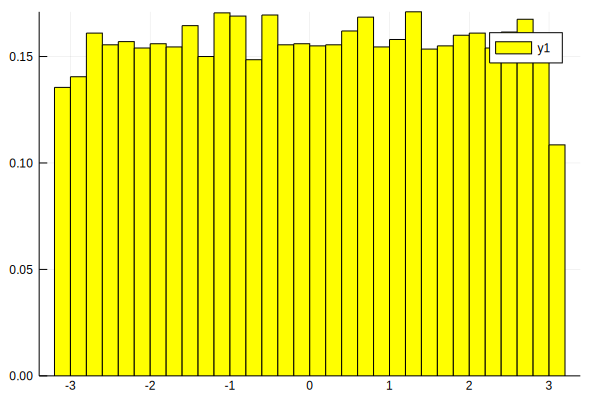

In [241]:
#Algorithm 2.4 of Random Eigenvalues by Alan Edelman

#Experiment: Generate random orthogonal/unitary matrices
#Plot: Histogram of eigenvalues
#Theory: Eigenvalues are on a unit circle

##Parameters
t=1000  # trials
n=10   # matrix size
dx=0.05 # bin size
v=Complex64[]   # eigenvalue samples

##Experiment
for i=1:t
    X= randn(n,n) + 1im*randn(n,n)             # random complex matrix
    F = qrfact(X)                              # QR factorization (Q is an orthogonal / unitary matrix)
    F=F[:Q][:,:]*sign.(diagm(randn(n)) + 1im*diagm(randn(n)))
    v = append!(v, eigvals(F))        # calculate eigenvalues of Q and append to result vector
end

## TODO: Fix plotting, plot polar histogram
    

##Plot
x = (-(1+dx/2):dx:(1+dx/2))*pi
histogram(angle.(v), nbins = 50, normed = true, color="yellow")

##Theory
#plot(x, t*n*dx, proj=:polar, m=2)

In [161]:
# Algorithm 2.5 of Random Eigenvalues by Alan Edelman

# Patience Sort

function patiencesort(arr::Vector)
    if length(arr) == 0 return copy(arr) end
    L = Vector{typeof(arr)}(length(arr))
    L[1] = [arr[1]]
 
    for i in 2:length(arr)
        nextL = []
        for j in 1:i
            if arr[j] < arr[i] && length(L[j]) ≥ length(nextL)
                nextL = L[j]
            end
        end
        L[i] = vcat(nextL, arr[i])
    end
 
    return length(L[indmax(length.(L))])
end

patiencesort (generic function with 2 methods)

In [242]:
# Algorithm 2.6 if Random Eigenvalues by Alan Edelman

#Experiment: Generate random orthogonal/unitary matrices
#Theory: Counts longest increasing subsequence statisitics
t=100000   # number of trials
n=4     # permutation size
k=3     # lenth of longest increasing subsequence
v=zeros(t,1)  # samples

##Experiment
for i=1:t
    X= randn(k,k) + 1im*randn(k,k)             # random complex matrix
    F = qrfact(X)                              # QR factorization (Q is an orthogonal / unitary matrix)
    F=F[:Q][:,:]*sign.(diagm(randn(k)) + 1im*diagm(randn(k)))
    v[i] = abs(trace(F))^(2*n)        # calculate eigenvalues of Q and append to result vector
end

z = mean(v)

##Theory
p = permutations(1:n) |> collect
c = 0
for i = 1:factorial(n)
    c = c + (patiencesort(p[i][:]) <= k);
end

[z c]

1×2 Array{Float64,2}:
 23.0461  23.0

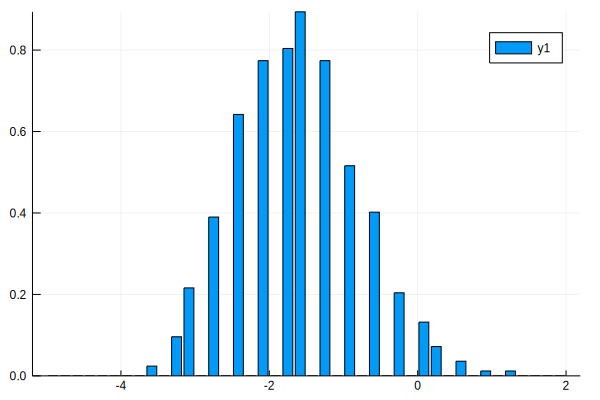

In [279]:
# Algorithm 2.7 if Random Eigenvalues by Alan Edelman

#Experiment: Sample random permutations
#Plot: Histogram of lengths of longest increasing subsequences
#Theory: The Tracy-Widom law
t=1000    # number of trials
n=6^4     # length of permutations
dx=1/6    # bin size
v=zeros(t,1)  # samples

##Experiment
for i=1:t
    v[i] = patiencesort(randperm(n))
end
w = (v-2*sqrt.(n))/(n^(1/6))

#histogram(w, nbins = 50, normed = true, color="yellow")
v_hist = fit(Histogram,w[:],closed=:left,-5:dx:2)
bar(v_hist.edges,v_hist.weights/(t*dx))

## TODO: Plot Tracy-Widom as comparison

3